# **Prediction using Unsupervised ML**
**(Level - Beginner)**

**Author:- Kiran Malwe** 

● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

● Dataset : https://bit.ly/3kXTdox

● Source : https://machinelearningmastery.com/clustering-algorithms-with-python/


In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# import data

iris = pd.read_csv('/content/Iris.csv',index_col='Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.shape

(150, 5)

In [12]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
x = iris.iloc[:, 0:4].values
y = iris.Species

## **KMeans Clustering**

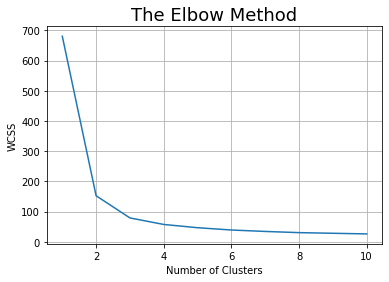

In [15]:
# Finding number of clusters using KMeans Classification
from sklearn.cluster import KMeans

wcss = [] # Within Cluster Sum of Squares

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  # To get the values used in the graph, 
  # we train multiple models using a different number of clusters and 
  # storing the value of the intertia_ property (WCSS) every time.

# Plotting elbow graph to know the no. of clusters
plt.grid()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method',size=18)
plt.xlabel('Number of Clusters',size=10)
plt.ylabel('WCSS',size=10)
plt.show();


From the graph we find out the number of clusters.Elbow occures where optimum no. of clusters occures. 

From this we can choose **3** no. of clusters.

In [16]:
# Applying KMeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 123)
y_pred = kmeans.fit_predict(x)

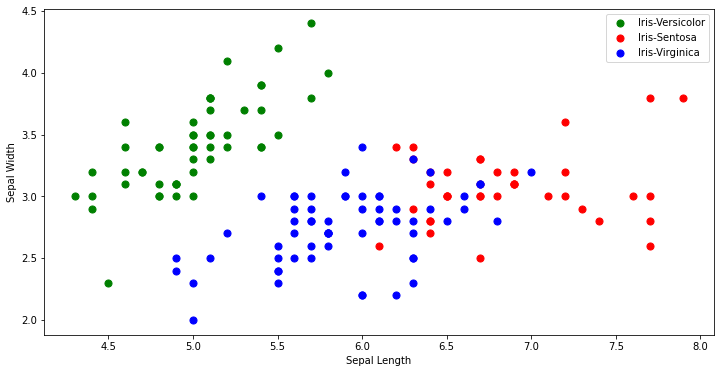

In [17]:
# Visulization of clusters between any two column
plt.figure(figsize = (12, 6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s  = 50, c = 'green', label='Iris-Versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s  = 50, c = 'red', label='Iris-Sentosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s  = 50, c = 'blue', label='Iris-Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend();

##**Affinity Propagation classification**

In [18]:
from sklearn.cluster import AffinityPropagation
from numpy import unique

# Define Model
model = AffinityPropagation(damping = 0.7)
#dumping helps to decide no. of clusters.

# fit the model
model.fit(x)

#Assign cluster to each example
y_pred = model.predict(x)
# retrive unique cluster
clusters = unique(y_pred)
clusters

array([0, 1, 2, 3, 4, 5])

It gives 7 numbres of clusters which didn't give clear idea.

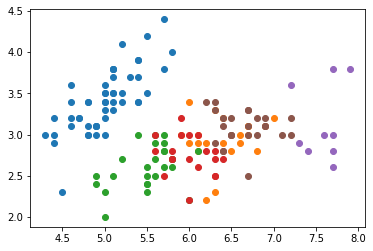

In [20]:
from numpy import where
# create scatter plot for samples from each cluster
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(y_pred == cluster)
  # create scatter of these samples
  plt.scatter(x[row_ix, 0], x[row_ix, 1]);
  

## **Agglomerative Clustering**

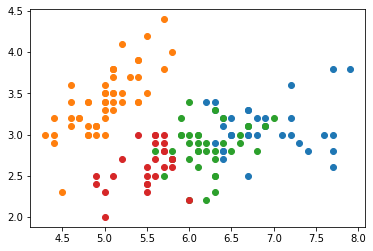

In [21]:
from sklearn.cluster import AgglomerativeClustering

#Define model
model = AgglomerativeClustering(n_clusters = 4)

# fit model and predict clusters
y_pred = model.fit_predict(x)

# retrive unique cluster
clusters = unique(y_pred)

# Create scatter plot for the samples from each cluster
for cluster in clusters:
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1]);

## **BIRCH Clustering**
(Balanced Iterative Reducing and Clustering using
Hierarchies)

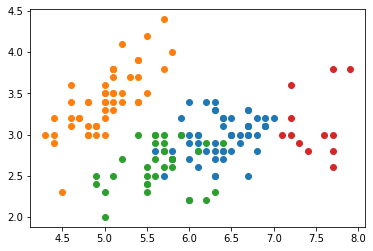

In [22]:
from sklearn.cluster import Birch

# define model
model = Birch(n_clusters = 4, threshold = 0.1) 
# threshold decided to put the sample or point into the cluster.less threashold finely classified points.

# Fit and Predict
y_pred = model.fit_predict(x)

# unique cluster
clusters = unique(y_pred)

# Plot the clusters
for cluster in clusters:
  # row index for samples in the cluster
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1]);


##**DBSCAN**
(Density-Based Spatial Clustering of Applications with Noise)

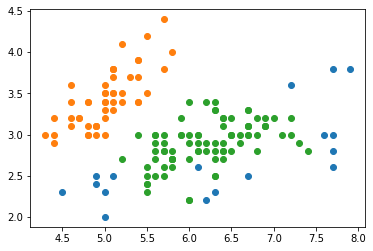

In [26]:
from sklearn.cluster import DBSCAN

# define model
model = DBSCAN(eps=0.5, min_samples =5)

# fit and Predict
y_pred = model.fit_predict(x)

# unique cluster
clusters = unique(y_pred)

# plot clusters
for cluster in clusters:
  # define row indexes for samples in the cluster
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix,0], x[row_ix, 1])
  

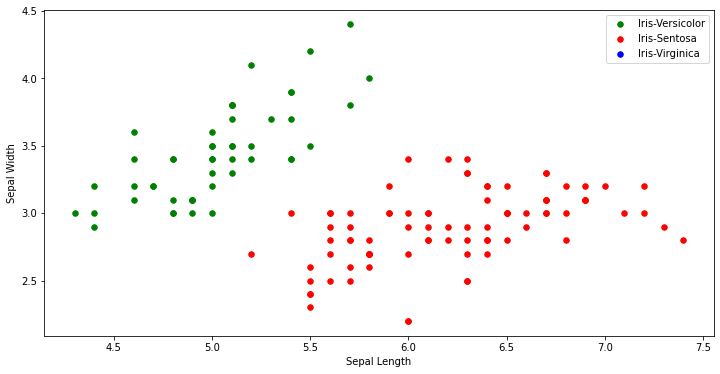

In [24]:
plt.figure(figsize = (12, 6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s  = 30, c = 'green', label='Iris-Versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s  = 30, c = 'red', label='Iris-Sentosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s  = 30, c = 'blue', label='Iris-Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend();

# #**KMeans Clustering**

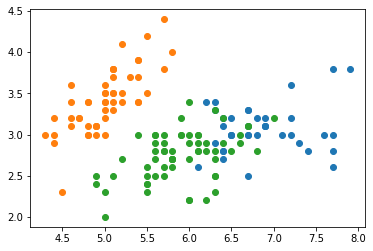

In [47]:
# define model
model = KMeans(n_clusters = 3)

#fit and predict the model
#model.fit(x)
y_pred = model.fit_predict(x)

# find the unique clusters
clusters = unique(y_pred)

for cluster in clusters:
  # row index to the sample into the stucture
  row_ix = where(y_pred == cluster)

  #plot graph
  plt.scatter(x[row_ix, 0], x[row_ix, 1]);

## **Mini Batch KMeans Clustering**

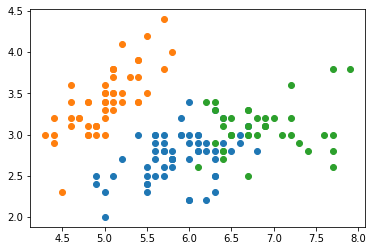

In [44]:
from sklearn.cluster import MiniBatchKMeans 

# define model
model = MiniBatchKMeans(n_clusters = 3)

# fit and predict model
model.fit(x)
y_pred = model.predict(x)

#unique clustur
clusters = unique(y_pred)

for cluster in clusters:
  # row index to the samples in clusters
  row_ix = where(y_pred == cluster)

  #plot 
  plt.scatter(x[row_ix, 0], x[row_ix, 1])


### **MeanShift**

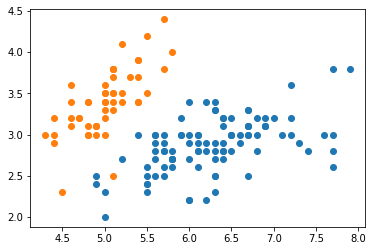

In [49]:
from sklearn.cluster import MeanShift
model = MeanShift()
y_pred = model.fit_predict(x)
clusters = unique(y_pred)
for cluster in clusters:
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1])

## **OPTICS**
(Ordering Points To Identify the Clustering Structure)

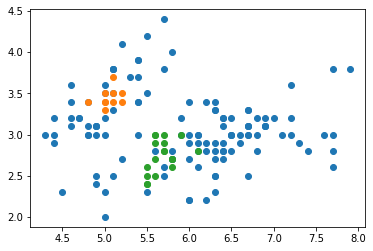

In [52]:
from sklearn.cluster import OPTICS
model = OPTICS(eps= 0.8, min_samples=10)
y_pred = model.fit_predict(x)
clusters = unique(y_pred)
for cluster in clusters:
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1])


### **Spectral Clustering**

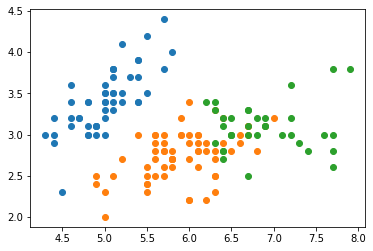

In [53]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 3)
y_pred = model.fit_predict(x)
clusters = unique(y_pred)
for cluster in clusters:
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1])

### **Gaussian Mixture Model**

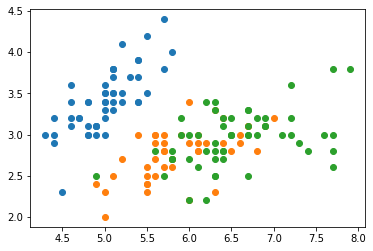

In [60]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
y_pred = model.fit_predict(x)
clusters = unique(y_pred)
for cluster in clusters:
  row_ix = where(y_pred == cluster)
  plt.scatter(x[row_ix, 0], x[row_ix, 1])
